In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
automobile_df = pd.read_csv('/cfsshares/prd/wmla/sigs/aaaixusr1/notebooks/aa-jupyter-sig-2-3-1/8ff5ce39-e7c7-4a6e-81e1-b62e40434236/DillardsJupyter-5-4-0-11/notebooks/Pluralsight/Datasets/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,20.0,6,232.0,100,2914,16.0,44
1,16.0,8,351.0,149,4335,14.5,42
2,36.0,4,105.0,74,1980,15.3,37
3,25.5,4,140.0,89,2755,15.8,42
4,26.4,4,140.0,88,2870,18.1,39


In [3]:
result_dict = {}

In [14]:
def build_model(regression_fn,
               name_of_y_col,
               names_of_x_cols,
               dataset,
               test_frac=0.2,
               preprocess_fn=None,
               show_plot_Y=False,
               show_plot_scatter=False):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : ", model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        fig, ax = plot.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line', 'Observed data'])
        plt.show()
        
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }

In [11]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score: ', result_dict[key]['training_score'])
        print('Test score: ', result_dict[key]['test_score'])
        print()

In [6]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6858455432820748
Test_score :  0.7090001197889544


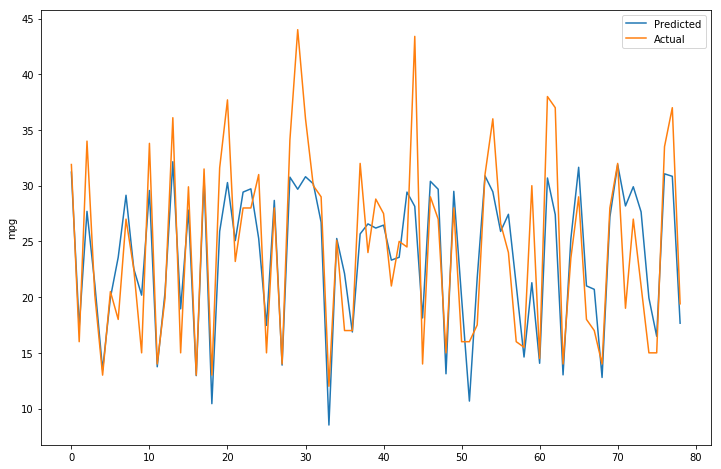

In [15]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                'mpg',
                                                ['weight'],
                                                automobile_df,
                                                show_plot_Y=True)

Training_score :  0.7080462756757053
Test_score :  0.7011134773496062


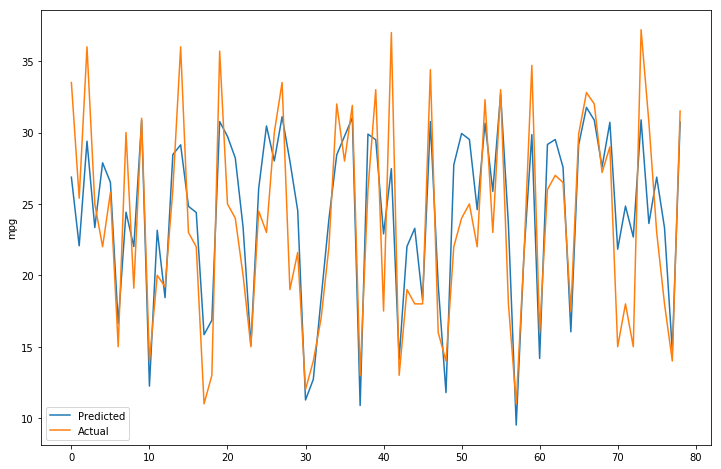

In [16]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Training_score :  0.6977373959624837
Test_score :  0.7305885794154819


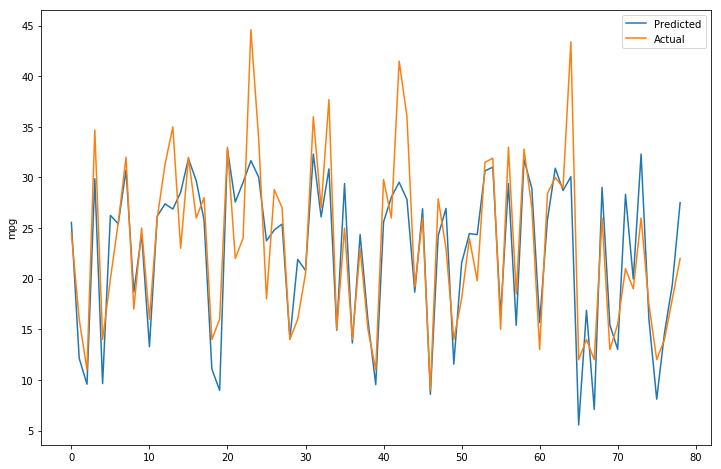

In [17]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                     'mpg',
                                                     ['horsepower',
                                                     'weight'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [18]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6858455432820748
Test score:  0.7090001197889544

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7080462756757053
Test score:  0.7011134773496062

Regression:  mpg ~ parsimonius_linear
Training score:  0.6977373959624837
Test score:  0.7305885794154819



In [19]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.728812768167745
Test_score :  0.6217384737657297


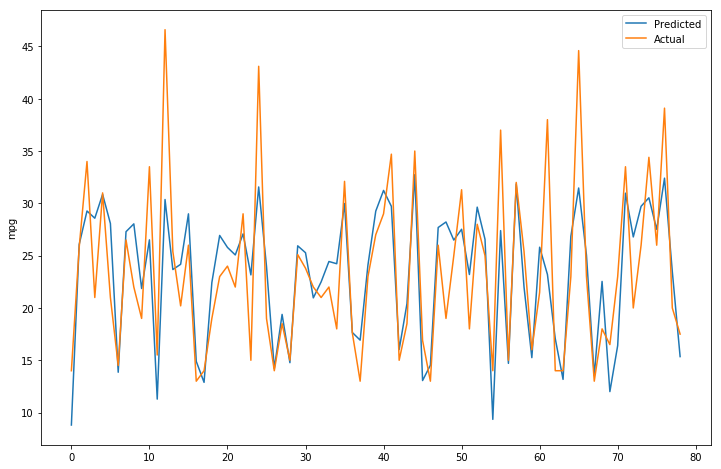

In [20]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [21]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6858455432820748
Test score:  0.7090001197889544

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7080462756757053
Test score:  0.7011134773496062

Regression:  mpg ~ parsimonius_linear
Training score:  0.6977373959624837
Test score:  0.7305885794154819

Regression:  mpg ~ kitchen_sink_lasso
Training score:  0.728812768167745
Test score:  0.6217384737657297



In [22]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6851075177863836
Test_score :  0.6750867137064742


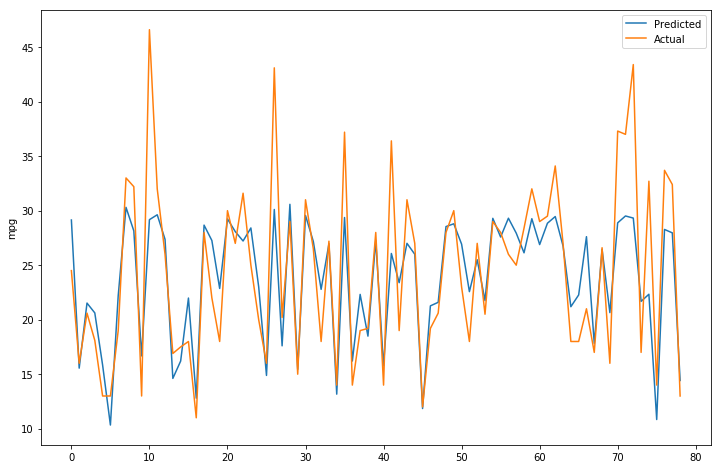

In [23]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [24]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6858455432820748
Test score:  0.7090001197889544

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7080462756757053
Test score:  0.7011134773496062

Regression:  mpg ~ parsimonius_linear
Training score:  0.6977373959624837
Test score:  0.7305885794154819

Regression:  mpg ~ kitchen_sink_lasso
Training score:  0.728812768167745
Test score:  0.6217384737657297

Regression:  mpg ~ kitchen_sink_ridge
Training score:  0.6851075177863836
Test score:  0.6750867137064742



In [29]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5,
                   normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):
    
    print("Equivalent to: ", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                      normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

In [27]:
from functools import partial

Equivalent to:  OLS
Training_score :  0.712280218452104
Test_score :  0.6869601524940472


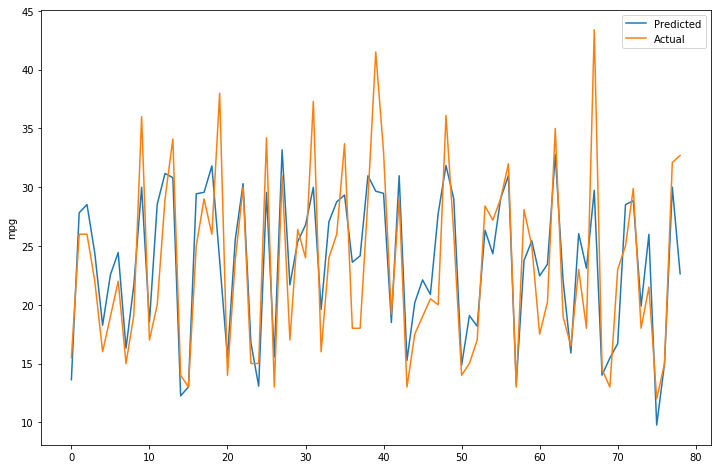

In [34]:
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg,
                                                                        alpha=0, equivalent_to="OLS"),
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Equivalent to:  Lasso
Training_score :  0.711678427049828
Test_score :  0.681859900430595


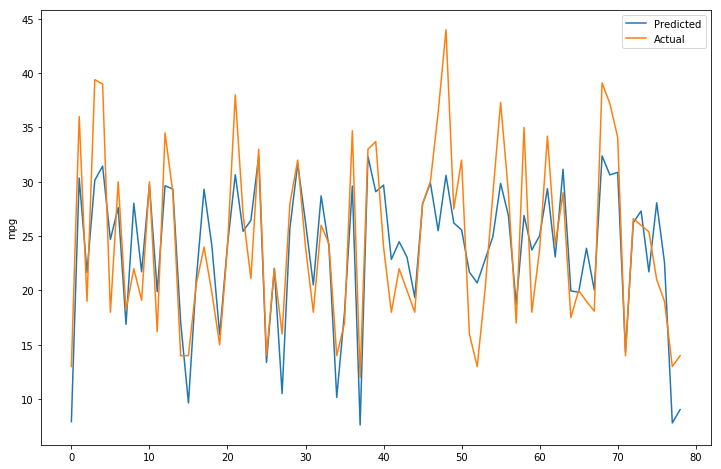

In [35]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio=1, equivalent_to="Lasso"),
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Equivalent to:  Ridge
Training_score :  0.72158517064519
Test_score :  0.6522996281082744


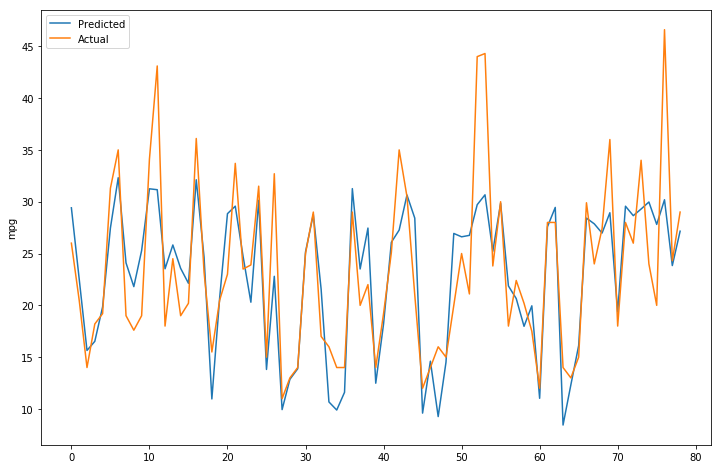

In [36]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio=0, equivalent_to="Ridge"),
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Equivalent to:  Elastic Net
Training_score :  0.709077849135423
Test_score :  0.6938498441030936


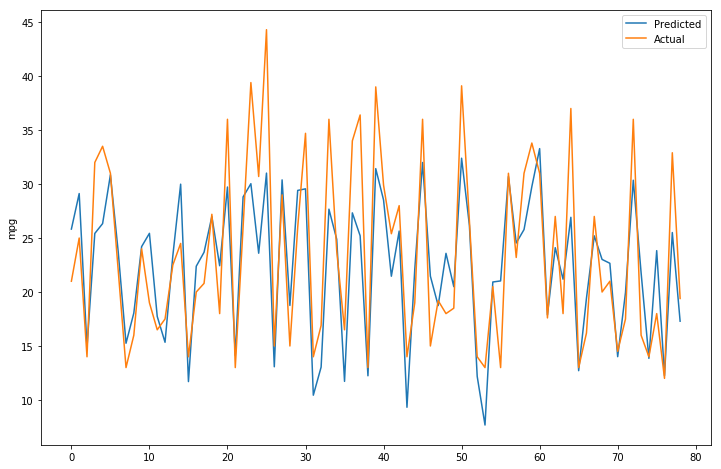

In [37]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [38]:
compare_results()

Regression:  mpg ~ single_linear
Training score:  0.6858455432820748
Test score:  0.7090001197889544

Regression:  mpg ~ kitchen_sink_linear
Training score:  0.7080462756757053
Test score:  0.7011134773496062

Regression:  mpg ~ parsimonius_linear
Training score:  0.6977373959624837
Test score:  0.7305885794154819

Regression:  mpg ~ kitchen_sink_lasso
Training score:  0.728812768167745
Test score:  0.6217384737657297

Regression:  mpg ~ kitchen_sink_ridge
Training score:  0.6851075177863836
Test score:  0.6750867137064742

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score:  0.712280218452104
Test score:  0.6869601524940472

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score:  0.711678427049828
Test score:  0.681859900430595

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score:  0.72158517064519
Test score:  0.6522996281082744

Regression:  mpg ~ kitchen_sink_elastic_net
Training score:  0.709077849135423
Test score:  0.6938498441030936

